<a href="https://colab.research.google.com/github/omicsEye/rahlab/blob/master/tools/PubMed_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PubMed Visualization
This notebook will help you to visualize the sample output of searches trough the PubMed database.  
  
## Data format
To prepare the data:  
1. place all the data files in a directory with the following name foramt:  _**GROUPNAME(underline)SUBGROUPNAME.csv**_
2. replace the directory name with the _dat_directory_ argument in the **data_prep** function (It's default value is _pubmed_data_)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import datetime

In [5]:
def data_prep(dat_directory  = 'path-to-data/'):
    cn = 0
    for file in os.listdir(dat_directory + '/'):
        file_path = str(dat_directory + '/' + file)
        temp = pd.read_csv(file_path, skiprows=1, sep=',')
        temp.columns = ['year', 'count']
        temp.loc[:, 'omics'] = file.split('_')[0].split('.')[0]
        temp.loc[:, 'tech'] = file.split('_')[-1].split('.')[0]
        if cn == 0:
          df = temp.copy()
        else:
          df = pd.concat([df, temp], ignore_index=True)
        cn += 1
    return df

In [6]:
def ncolors(n, colormap='cividis'):
    CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
    #seaborn-colorblind = ['0072B2', '009E73', 'D55E00', 'CC79A7', 'F0E442', '56B4E9']
    """utility for defining N evenly spaced colors across a color map"""
    # colormap options: 'viridis' 'cividis' 'jet' 'gist_ncar', 'hsv', 'turbo'
    #import matplotlib.style as style

    #style.use("seaborn-colorblind") 
    cmap = plt.get_cmap(colormap)
    cmap_max = cmap.N
    return [cmap(int(k * cmap_max / (n - 1))) for k in range(n)]

['Adiposity', 'Alzeimer’s disease', 'COVID-19', 'Cancer', 'Cardiovascular', 'Inflammatory Bowel Disease', 'Kidney disease', 'Type 2 Diabetes']
0      LC-MS
1      LC-MS
2      LC-MS
3      LC-MS
4      GC-MS
       ...  
337      NMR
338      NMR
339      NMR
340      NMR
341      NMR
Name: tech, Length: 342, dtype: object
Cancer
Cardiovascular
Type 2 Diabetes
Adiposity
Alzeimer’s disease
Kidney disease


<Figure size 432x288 with 0 Axes>

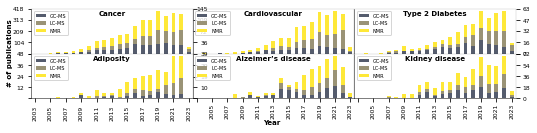

In [11]:
# name_list = ['Sparsity OR Zero-inflation', 'Batch effect OR Normalization', 'Longitudinal Or Time-series',
#              'Multivariable OR Multivariate', 'Meta-analysis OR Mega-analysis', 'False discovery OR False positive']


# name_list = ['Epigenomics', 'Genomics', 'Viromics', 'Metagenomics', 'Metabolomics','Proteomics']
fig=plt.figure()
fig = plt.figure(figsize=(7.2,1.6))
gs=GridSpec(4,6,wspace=0.0,hspace = 0.0)
#colors = ncolors(3)
drive_path =  '/content/drive/My Drive/omicsEye/NatureMetabolism/' # '/content/drive/My Drive/omicsEye/NatureCompSci/' #
px = []
cn = 0
df_main = data_prep(dat_directory= drive_path + '/data')
name_list = list(set(df_main.loc[:, 'omics']))
name_list.sort()
print(name_list)
print(df_main.loc[:, 'tech'])
name_list = [ 'Metagenomics', 'Metabolomics', 'Proteomics',
              'Genomics','Epigenomics', 'Viromics']
name_list = ['Cancer', 'Cardiovascular', 'Type 2 Diabetes', 'Adiposity', 'COVID-19', 'Inflammatory Bowel Disease' ]
name_list = ['Cancer', 'Cardiovascular', 'Type 2 Diabetes', 'Adiposity', 'Alzeimer’s disease', 'Kidney disease' ]
min_year = df_main.loc[:, 'year'].min()
max_year = df_main.loc[:, 'year'].max()
temp_0 = pd.DataFrame(range(min_year, max_year+1), columns=['year'])
tech_list = list(df_main.loc[:, 'tech'])
tech_list.sort()
colors = ncolors(len(tech_list))
color_pal = {}
for n, tech in enumerate(tech_list):
  color_pal[tech] = colors[n]

for i in [0,2]:
    for j in [0,2,4]:
        print (name_list[cn])
        temp = df_main.loc[df_main.loc[:, 'omics'] == name_list[cn], :]
        temp = pd.pivot_table(data=temp,
                              index=['year'], 
                              columns=['tech'],
                              values='count').reset_index()
        df = temp_0.merge(temp, how = 'left')
        df.fillna(0, inplace=True)

        #print(df)
        px.append(fig.add_subplot(gs[i:(i+2), j:(j+2)]))
        px[-1].tick_params(axis='both', which='major', labelsize=6)
        #print(len(df.columns)-1)
        try:
            df.plot(x='year', kind='bar',
                    stacked = True, color= color_pal, ax = px[-1])
        except:
            pass
        plt.xlabel("")
        ymin, ymax = px[-1].get_ylim()
        #print(np.round(np.linspace(0, ymax, 2)))
        px[-1].set_yticks(np.round(np.linspace(ymin, ymax, 5), 0))  
        px[-1].xaxis.set_tick_params(labelsize=6)
        px[-1].spines['top'].set_linewidth(0.1)
        px[-1].spines['left'].set_linewidth(0.5)
        px[-1].spines['right'].set_linewidth(0.1)
        px[-1].spines['bottom'].set_linewidth(0.5)
        px[-1].legend(loc ='upper left', fontsize = 5)
        
        if cn in [1, 4]:
            px[-1].tick_params(axis="y",direction="in", pad=-15)
        if cn in [2, 5]:
            px[-1].yaxis.tick_right()
        if cn <3:
            px[-1].yaxis.get_major_ticks()[0].label1.set_visible(False)
            px[-1].set_xticklabels([])
        else:
            px[-1].yaxis.get_major_ticks()[0].label1.set_visible(False)
            px[-1].set_xticks(px[-1].get_xticks()[::2])
            px[-1].xaxis.label.set_visible(False)
            if cn > 3:
                px[-1].xaxis.get_major_ticks()[0].label1.set_visible(False)
                px[-1].tick_params(axis="x",direction="out", pad=1)

          
            
        px[-1].xaxis.set_tick_params(labelsize=6)#COunt
        px[-1].yaxis.set_tick_params(labelsize=6)#Year
        
#         tag = tag_finder(file_list[cn])
        px[-1].text(.5, .85, name_list[cn], transform=px[-1].transAxes, ha="center", weight='bold', size =7)
        cn += 1
fig.text(0.5, -0.03, 'Year', ha='center', fontsize = 7, weight='bold')
fig.text(-0.01, 0.6, '# of publications', va='center', rotation='vertical', fontsize = 7, weight='bold')
plt.tight_layout(pad=0.05)

fig.savefig(drive_path+"/SFig1_V2.pdf", dpi=600, bbox_inches = "tight")
fig.savefig(drive_path+"/SFig1_V2.png", dpi=600, bbox_inches = "tight")
plt.show()